# Modell zur Bachelorarbeit

In [51]:
import pandas as pd
import numpy as np
import dill as pickle

import matplotlib.pyplot as plt

from custom_thesis_functions import *

%matplotlib inline

In [52]:
instance_info = ""

In [53]:
period = pd.date_range('2017-01-01 00:00', '2017-01-07 23:45', freq='h')

# _________________________________

In [54]:
path_tmp = path_pickle_data + create_date_format(period) + '\\'

## Import

In [55]:
filename = path_tmp + "\\network" + instance_info + ".pickle"

with open((path_tmp + 'network.pickle'), 'rb') as f:
    network = pickle.load(f)

In [56]:
excelFile_demand = pd.ExcelFile(path_import_data + 'DE Realisierter Stromverbrauch 2017.xlsx')

In [57]:
df_demand = pd.read_excel(excelFile_demand, sheet_name="mapping_demand",
                          index_col=0, header=0, usecols="A:J")

In [58]:
df_demand = (df_demand.replace('-',0)
             .resample('1H').sum()
             .loc[period])

## Visualization

## Map topography

Map in the background relies on the mpl_toolkits and the basemap packages to be installed

(<matplotlib.collections.PathCollection at 0x24fadb13438>,
 <matplotlib.collections.LineCollection at 0x24fa760a240>)

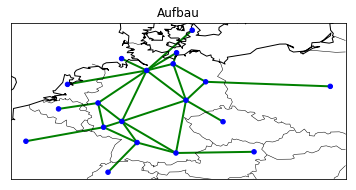

In [59]:
fig,ax=plt.subplots(1,1)

network.plot(bus_sizes=20, title="Aufbau")

In [60]:
df_dispatch_calculated = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum()
df_dispatch_calculated[df_dispatch_calculated < 0] = 0
df_dispatch_calculated = df_dispatch_calculated[["Wind", "ee", "Braunkohle", "Steinkohle", "Erdgas", "Import"]]

In [61]:
colors = {"Erdgas":"orange",
          "Braunkohle":"brown",
          "Steinkohle":"black",
          "Wind":"blue",
          "ee":"green",
          "Import":"red",
          "Kernenergie":"yellow"}

In [62]:
graph_colors = {"Erdgas":"orange",
                "Braunkohle":"brown",
                "Steinkohle":"black",
                "Wind":"blue",
                "ee":"green",
                "Import":"red"}

col_order = ["Wind", "ee", "Braunkohle", "Steinkohle", "Erdgas", "Import"]
# power_by_carrier = power_by_carrier[col_order]

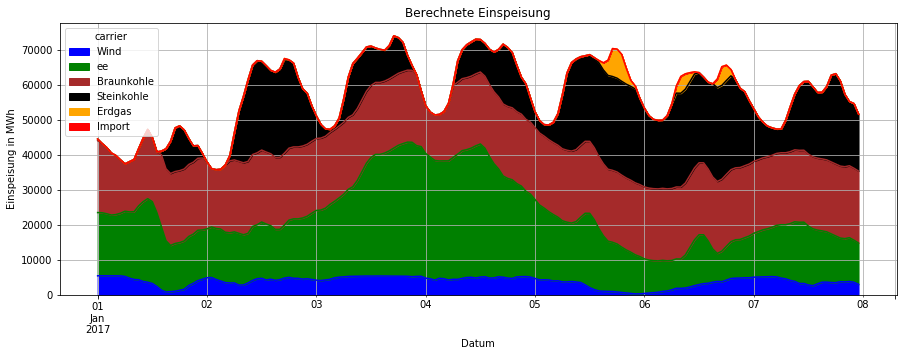

In [63]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,5)

ax.grid(True, which='minor')
ax.set_xlabel("Datum")
ax.set_ylabel("Einspeisung in MWh")
df_dispatch_calculated.plot(kind='area', ax=ax, title="Berechnete Einspeisung", grid=True, color=[colors[i] for i in df_dispatch_calculated.columns])

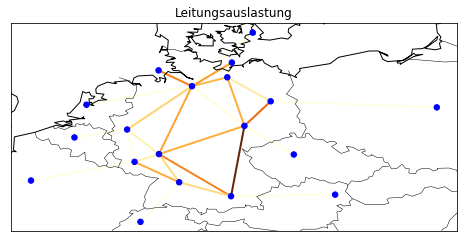

In [64]:
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(8,8))

perc_load = network.lines_t.p0.iloc[45] / network.lines.s_nom

dist = network.plot(bus_sizes=30, line_colors=abs(perc_load), title="Leitungsauslastung", line_cmap="YlOrBr")

(<matplotlib.collections.PathCollection at 0x24fab0135c0>,
 <matplotlib.collections.LineCollection at 0x24fab013d30>)

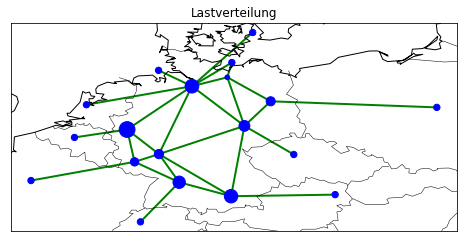

In [65]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,8)

rel_bus_size = df_demand.mean()/100
i = len(network.buses) - len(rel_bus_size)
while i <= len(network.buses):
    rel_bus_size = np.append(rel_bus_size, 20)
    i += 1

network.plot(ax=ax,bus_sizes=rel_bus_size*2, title="Lastverteilung")